<a href="https://colab.research.google.com/github/Eshika-Ranjan-Singh/Financial-Forecasting-On-Adult-s-Income-Prediction-Models/blob/main/Financial_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv(r"/adult.csv")

In [ ]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
df.shape

(32561, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
df['income'].value_counts

<bound method IndexOpsMixin.value_counts of 0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557    <=50K
32558     >50K
32559    <=50K
32560    <=50K
Name: income, Length: 32561, dtype: object>

In [ ]:
df['sex'].value_counts

<bound method IndexOpsMixin.value_counts of 0        Female
1        Female
2        Female
3        Female
4        Female
          ...  
32556      Male
32557    Female
32558      Male
32559    Female
32560      Male
Name: sex, Length: 32561, dtype: object>

In [ ]:
pd.crosstab(df['sex'],df['race'])

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
sex,,,,,
Female,119,346,1555,109,8642
Male,192,693,1569,162,19174


In [ ]:
df["occupation"]=df["occupation"].replace("?","others")

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['income']=le.fit_transform(df['income'])

df['workclass']=le.fit_transform(df['workclass'])

df['education']=le.fit_transform(df['education'])

df['relationship']=le.fit_transform(df['relationship'])

df['marital.status']=le.fit_transform(df['marital.status'])

df['occupation']=le.fit_transform(df['occupation'])

df['race']=le.fit_transform(df['race'])

df['sex']=le.fit_transform(df['sex'])

df['native.country']=le.fit_transform(df['native.country'])

In [ ]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,11,9,6,14,1,4,0,0,4356,40,39,0
1,82,4,132870,11,9,6,3,1,4,0,0,4356,18,39,0
2,66,0,186061,15,10,6,14,4,2,0,0,4356,40,39,0
3,54,4,140359,5,4,0,6,4,4,0,0,3900,40,39,0
4,41,4,264663,15,10,5,9,3,4,0,0,3900,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,4,310152,15,10,4,10,1,4,1,0,0,40,39,0
32557,27,4,257302,7,12,2,12,5,4,0,0,0,38,39,0
32558,40,4,154374,11,9,2,6,0,4,1,0,0,40,39,1
32559,58,4,151910,11,9,6,0,4,4,0,0,0,40,39,0


In [ ]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,11,9,6,14,1,4,0,0,4356,40,39,0
1,82,4,132870,11,9,6,3,1,4,0,0,4356,18,39,0
2,66,0,186061,15,10,6,14,4,2,0,0,4356,40,39,0
3,54,4,140359,5,4,0,6,4,4,0,0,3900,40,39,0
4,41,4,264663,15,10,5,9,3,4,0,0,3900,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,4,310152,15,10,4,10,1,4,1,0,0,40,39,0
32557,27,4,257302,7,12,2,12,5,4,0,0,0,38,39,0
32558,40,4,154374,11,9,2,6,0,4,1,0,0,40,39,1
32559,58,4,151910,11,9,6,0,4,4,0,0,0,40,39,0


In [ ]:
df.describe()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.868892,1.897784e+05,10.298210,10.080679,2.611836,6.421762,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,36.718866,0.240810
std,13.640433,1.455960,1.055500e+05,3.870264,2.572720,1.506222,4.328619,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,7.823782,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370510e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


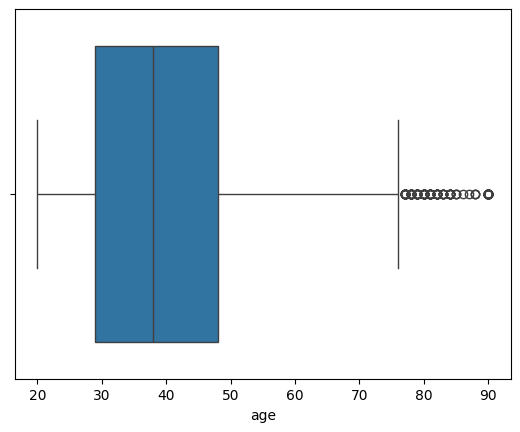

In [ ]:
filtered_df = df[(df['age'] >= 20) & (df['age'] <= 90)]
sns.boxplot(x=filtered_df['age'])
plt.show()



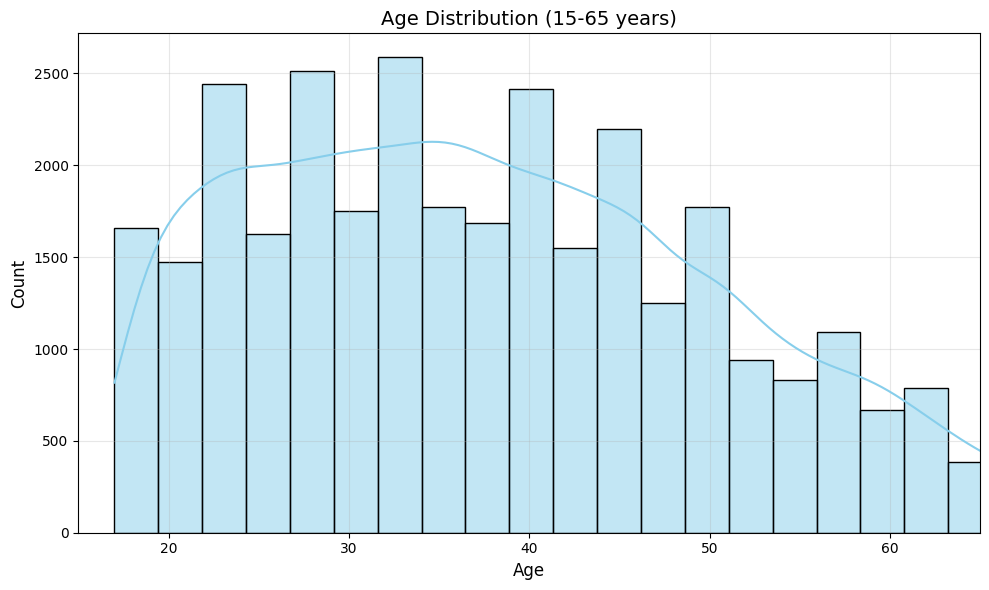

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution (15-65 years)', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xlim(15, 65)  # Set age range as per your description
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

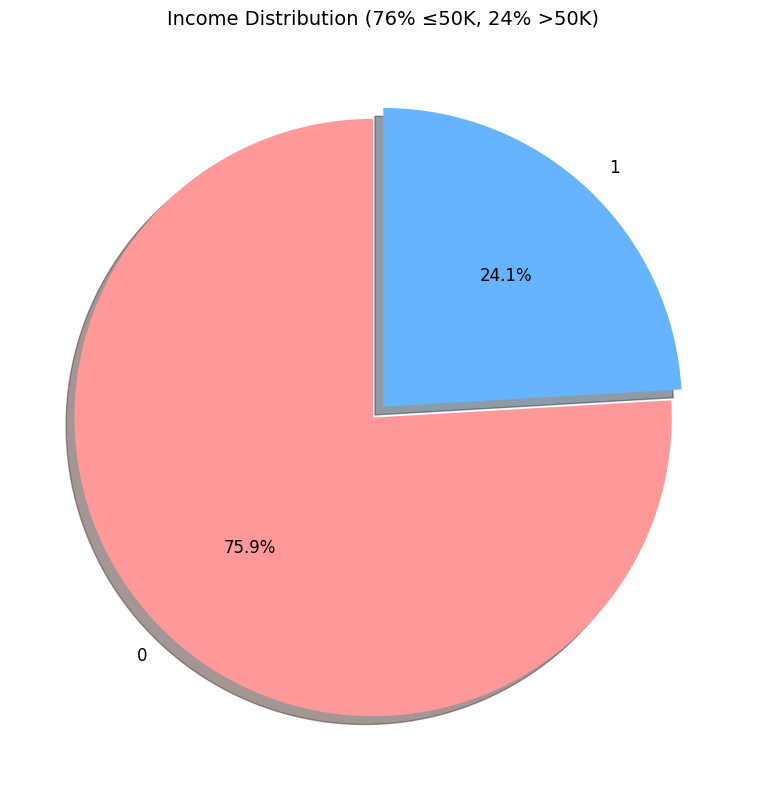

In [ ]:
plt.figure(figsize=(8, 8))
income_counts = df['income'].value_counts(normalize=True) * 100
colors = ['#ff9999','#66b3ff']  # Custom colors
explode = (0.05, 0)  # Explode the 1st slice

plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90, explode=explode,
        shadow=True, textprops={'fontsize': 12})
plt.title('Income Distribution (76% ≤50K, 24% >50K)', fontsize=14)
plt.tight_layout()
plt.show()

/tmp/ipython-input-21-359245859.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='education', data=df, order=education_order, palette=colors)


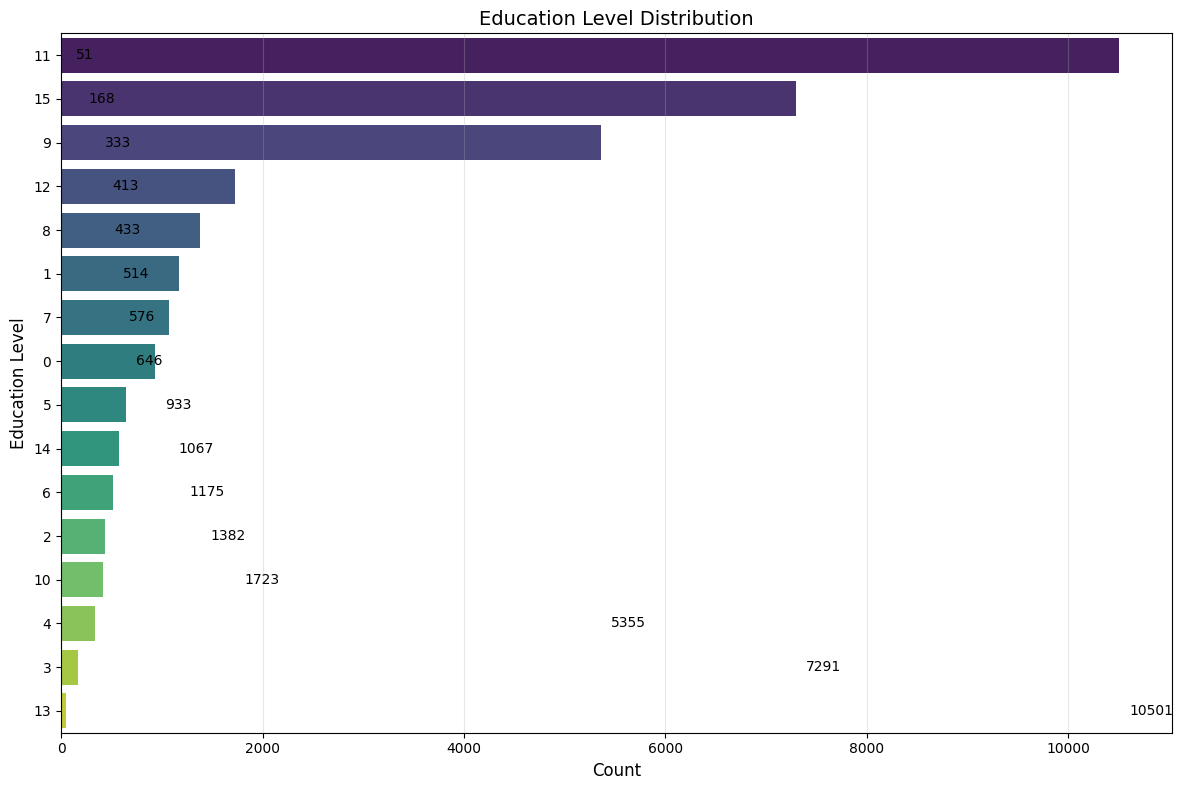

In [ ]:
plt.figure(figsize=(12, 8))
education_order = df['education'].value_counts().index

# Custom color palette
colors = sns.color_palette("viridis", len(education_order))

sns.countplot(y='education', data=df, order=education_order, palette=colors)
plt.title('Education Level Distribution', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Education Level', fontsize=12)
plt.grid(True, axis='x', alpha=0.3)

# Add count labels to each bar
for i, count in enumerate(df['education'].value_counts().sort_values()):
    plt.text(count+100, i, str(count), va='center')

plt.tight_layout()
plt.show()

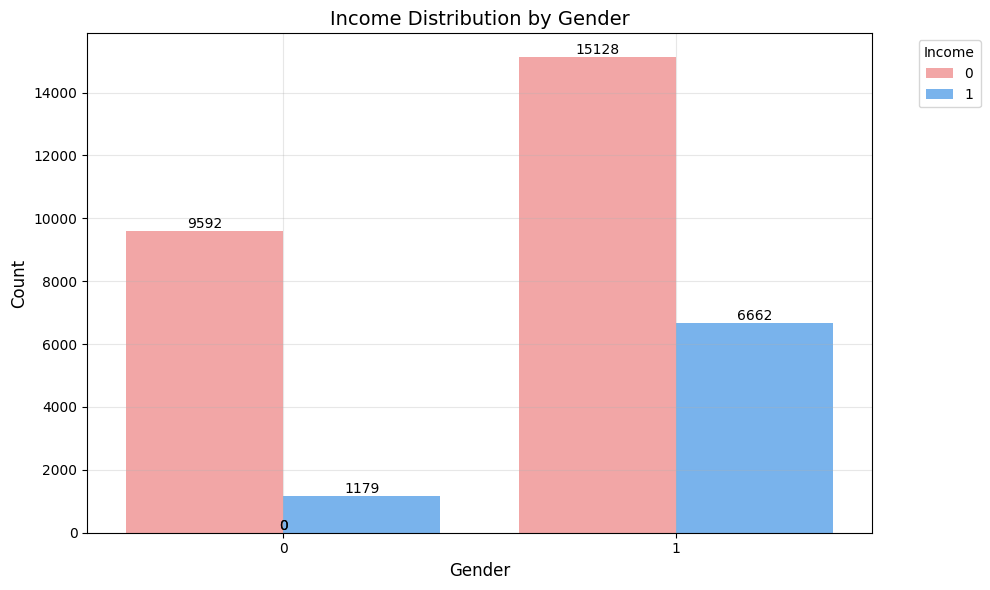

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='sex', hue='income', data=df,
                  palette=['#ff9999','#66b3ff'])

plt.title('Income Distribution by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add exact count numbers on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

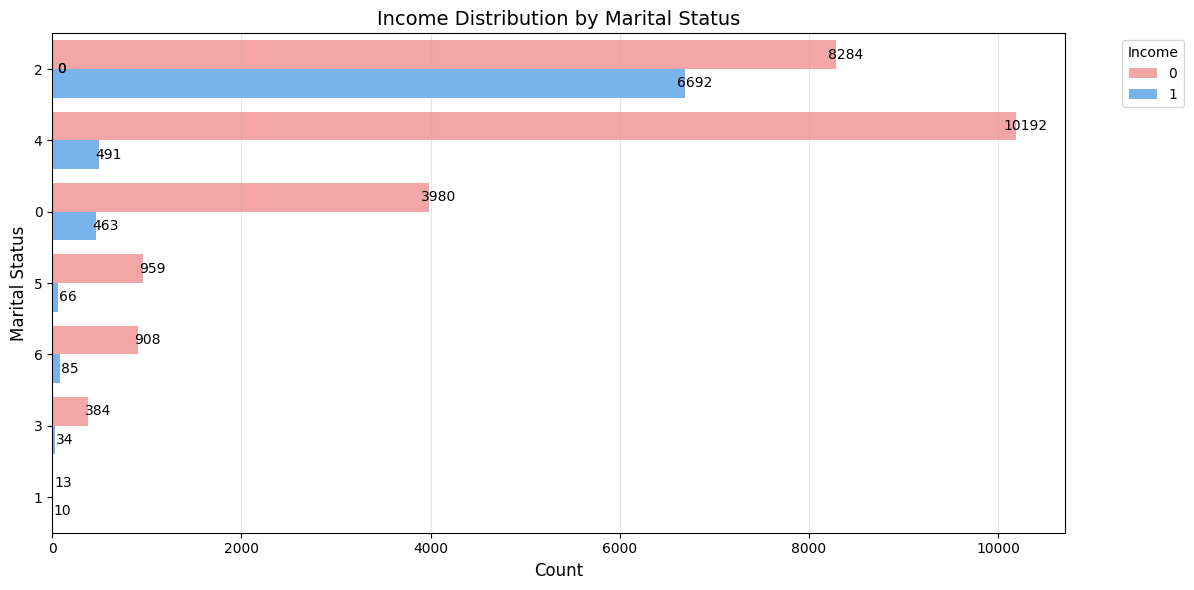

In [ ]:
plt.figure(figsize=(12, 6))
order = df['marital.status'].value_counts().index

ax = sns.countplot(y='marital.status', hue='income', data=df,
                  order=order, palette=['#ff9999','#66b3ff'])

plt.title('Income Distribution by Marital Status', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Marital Status', fontsize=12)

# Add count labels
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 100, p.get_y() + p.get_height()/2,
             '{:1.0f}'.format(width),
             ha='center', va='center')

plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

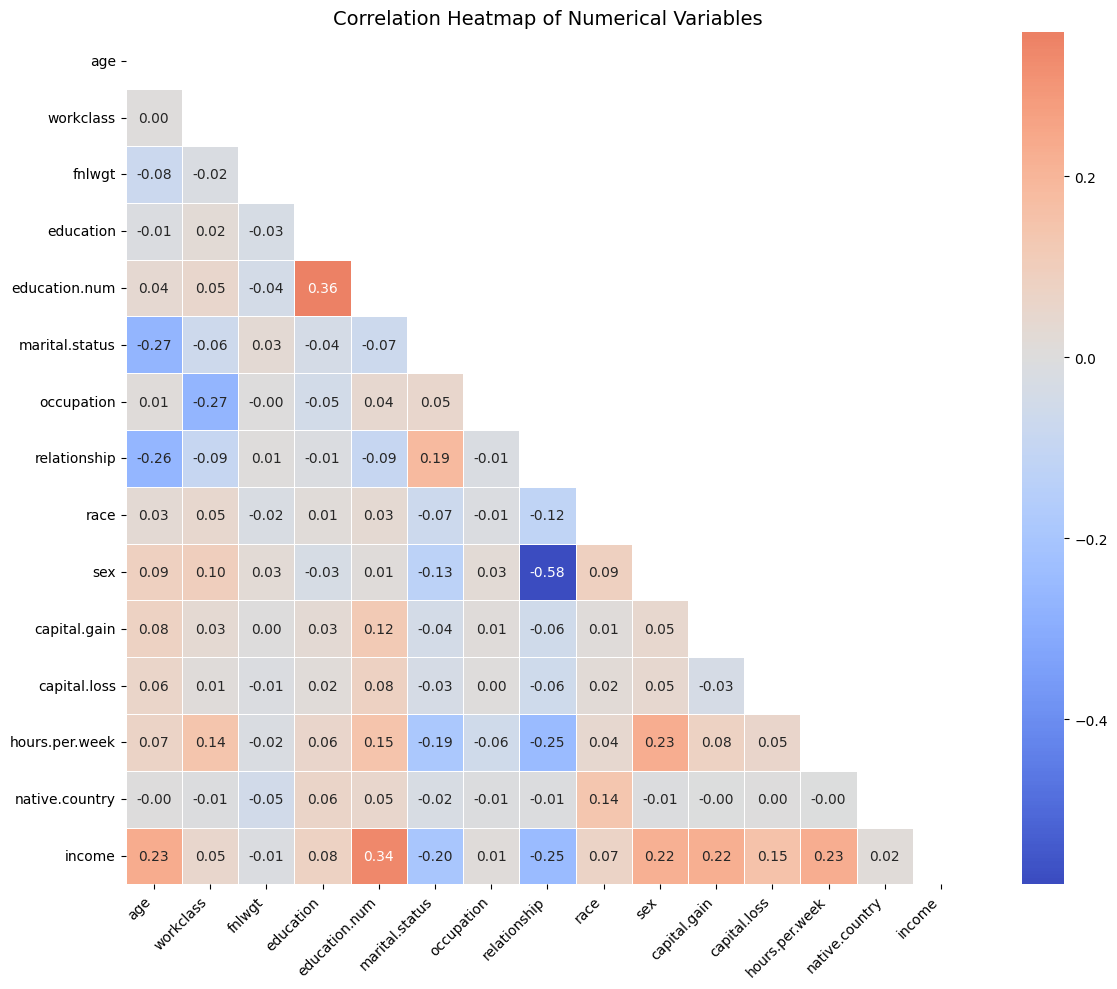

In [ ]:
plt.figure(figsize=(12, 10))

# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[numerical_cols].corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create heatmap
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm',
           center=0, fmt='.2f', linewidths=.5,
           annot_kws={"size": 10})

plt.title('Correlation Heatmap of Numerical Variables', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state = 42)

In [ ]:
#x and y partition
x=df.drop('income', axis=1)
y=df['income']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [ ]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()

In [ ]:
model1.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
LogisticRegression()

LogisticRegression()

In [ ]:
y_pred_train= model1.predict(x_train)
y_pred_test=model1.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test)

In [ ]:
print("train_accuracy",train_acc)
print('test_accuracy',test_acc)

train_accuracy 0.7873925061425061
test_accuracy 0.7871948410870566


In [ ]:
from sklearn.model_selection import cross_val_score
print("cross_val_score",cross_val_score(model1,x,y,cv=5).mean())

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

cross_val_score 0.7518823249362171


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train,y_pred_train))

[[18731  1069]
 [ 4469  1779]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier (criterion="gini", max_depth=5, splitter="best")
model3.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_pred_train3 = model3.predict(x_train)
y_pred_test3 = model3.predict(x_test)

In [ ]:
train_acc3 = accuracy_score(y_train, y_pred_train3)
test_acc3 = accuracy_score(y_test, y_pred_test3)

In [ ]:
print("train_accuracy",train_acc3)
print('test_accuracy',test_acc3)

train_accuracy 0.8548065110565111
test_accuracy 0.8524489482573315


In [ ]:
print("cross_val_score",cross_val_score(model3,x,y,cv=5).mean())

cross_val_score 0.8038455455371623


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision=precision_score(y_train,y_pred_train3)
recall=recall_score(y_train,y_pred_train3)
f1=f1_score(y_train,y_pred_train3)
print("precision",precision)
print("recall",recall)
print("f1_score",f1)

precision 0.7859461966604824
recall 0.5424135723431498
f1_score 0.6418560606060606


In [ ]:
print(confusion_matrix(y_train,y_pred_train3))

[[18877   923]
 [ 2859  3389]]


In [ ]:
#Hyper parameter tuning
from sklearn.model_selection import GridSearchCV
estimator=DecisionTreeClassifier()
param_grid={"criterion":["gini","entropy"],"max_depth":list(range(1,6)),"splitter":["best","random"]}
grid=GridSearchCV(estimator,param_grid,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']})

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model4=RandomForestClassifier(criterion="gini",max_depth=7)
model4.fit(x_train,y_train)

RandomForestClassifier(max_depth=7)

In [ ]:
y_pred_train4=model4.predict(x_train)
y_pred_test4=model4.predict(x_test)

In [ ]:
train_acc4=accuracy_score(y_train,y_pred_train4)
test_acc4=accuracy_score(y_test,y_pred_test4)

In [ ]:
print("cross_val_score",cross_val_score(model4,x,y,cv=5).mean()*100)
print("train_accuracy",train_acc4*100)
print('test_accuracy',test_acc4*100)

cross_val_score 81.02952147113824
train_accuracy 85.86071867321867
test_accuracy 85.44449562413634


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model5=AdaBoostClassifier(n_estimators=41)
model5.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=41)

In [ ]:
y_pred_train5=model5.predict(x_train)
y_pred_test5=model5.predict(x_test)

In [ ]:
train_acc5=accuracy_score(y_train,y_pred_train5)
test_acc5=accuracy_score(y_test,y_pred_test5)

In [ ]:
print("cross_val_score",cross_val_score(model5,x,y,cv=5).mean())
print("train_accuracy",train_acc5)
print('test_accuracy',test_acc5)

cross_val_score 0.8124758232542664
train_accuracy 0.8489711302211302
test_accuracy 0.8470750806080147


**Performance Testing**

In [ ]:
precision = precision_score(y_train, y_pred_train3)
recall = recall_score(y_train, y_pred_train3)
f1 = f1_score(y_train, y_pred_train3)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.7859461966604824
Recall: 0.5424135723431498
F1 Score: 0.6418560606060606


In [ ]:
import joblib
joblib.dump(model3, "adaboost_model.joblib") 


['adaboost_model.joblib']

In [ ]:
import os
print("Current directory:", os.getcwd())